In [1]:
#Import libraries
import pandas as pd
from rdkit import Chem


In [2]:
# Load dataset using pandas functionality
mapk14_data = pd.read_parquet('../data/mapk14_1M.parquet')

In [3]:
# Check columns in the dataframe
mapk14_data.columns

Index(['smiles', 'molecule_hash', 'smiles_a', 'smiles_b', 'smiles_c',
       'seq_target_1', 'seq_target_2', 'seq_target_3', 'seq_matrix_1',
       'seq_matrix_2', 'seq_matrix_3', 'seq_load', 'target_enrichment'],
      dtype='object')

In [4]:
# Extract smiles column
smiles = mapk14_data['smiles']

#Check type to verify is a string
type(smiles)

pandas.core.series.Series

In [5]:
print(smiles[0])

CCCCCC/C=C/C(=O)N(CC(=O)NCc1cc(C(=O)NC)c(C)o1)Cc1ccccc1


In [11]:
from rdkit.Chem import Draw
#Check if first small molecule can be drawn from smiles identifier
m = Chem.MolFromSmiles('CCCCCC/C=C/C(=O)N(CC(=O)NCc1cc(C(=O)NC)c(C)o1)Cc1ccccc1')
img = Draw.MolToImage(m)

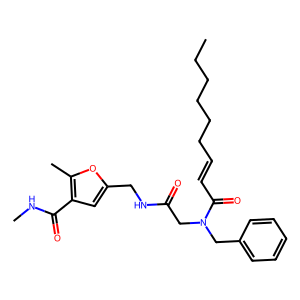

In [12]:
img

In [14]:

# Standardize to canonical SMILES
def to_canonical(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return Chem.MolToSmiles(mol, canonical=True)
        return None
    except Exception as e:
        print(f"Error processing SMILES: {smiles}, Error: {e}")
        return None

mapk14_data['canonical_smiles'] = smiles.apply(to_canonical)


In [15]:
mapk14_data['canonical_smiles']

0         CCCCCC/C=C/C(=O)N(CC(=O)NCc1cc(C(=O)NC)c(C)o1)...
1         CNC(=O)[C@@H](CCNC(=O)[C@@H](CCNC(=O)c1ccc2ccc...
2         CNC(=O)[C@H](CNC(=O)[C@@H](CNC(=O)COc1ccc(C)cc...
3         CNC(=O)[C@H](CNC(=O)[C@@H](COCc1ccccc1)NC(=O)C...
4         CNC(=O)[C@@H](CCNC(=O)[C@@H]1C[C@@H](NC(=O)c2c...
                                ...                        
999995    CC[C@@H](NC(=O)CN(C)C)C(=O)NC[C@@H](NC(=O)CC(C...
999996    CNC(=O)[C@@H]1C[C@@H](NC(=O)c2coc(C)n2)CN1C(=O...
999997    CNC(=O)[C@@H](CNC(=O)[C@H](CNC(=O)c1cccnc1SC)N...
999998    CNC(=O)[C@H]1CC[C@H](NC(=O)[C@@H]2CC(O)CN2Cc2c...
999999    CNC(=O)[C@@H]1C[C@H](NC(=O)[C@H]2CCCO2)CN1C(=O...
Name: canonical_smiles, Length: 1000000, dtype: object

In [16]:
mapk14_data.columns

Index(['smiles', 'molecule_hash', 'smiles_a', 'smiles_b', 'smiles_c',
       'seq_target_1', 'seq_target_2', 'seq_target_3', 'seq_matrix_1',
       'seq_matrix_2', 'seq_matrix_3', 'seq_load', 'target_enrichment',
       'canonical_smiles'],
      dtype='object')

In [18]:
canonical_smiles = mapk14_data['canonical_smiles']

In [19]:
print(canonical_smiles[0])

CCCCCC/C=C/C(=O)N(CC(=O)NCc1cc(C(=O)NC)c(C)o1)Cc1ccccc1


In [20]:
smiles[0]==canonical_smiles[0]

True

In [21]:
from rdkit.Chem import Descriptors

# List all available descriptor names
all_descriptors = [desc[0] for desc in Descriptors.descList]
print(f"Number of descriptors: {len(all_descriptors)}")
print(all_descriptors)


Number of descriptors: 209
['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1

In [ ]:
# df with canonical smiles is the same as smiles from original dataset
#Generate Molecular Descriptors
def calculate_all_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        return None
    descriptor_values = {}
    for desc_name, desc_func in Descriptors.descList:
        try:
            descriptor_values[desc_name] = desc_func(mol)
        except Exception as e:
            descriptor_values[desc_name] = None  # Handle failed descriptors
    return descriptor_values


# Apply descriptor calculation
descriptors = mapk14_data['canonical_smiles'].apply(calculate_all_descriptors)

# Convert descriptors into a DataFrame
descriptors_df = pd.DataFrame(descriptors.tolist())


In [188]:
canonical_smiles

0         CNC(=O)[C@H](CNC(=O)c1ccccc1CNC(=O)c1ccc(-c2no...
1         CNC(=O)[C@H](CCc1ccccc1)NC(=O)CN1C(=O)[C@@H](N...
2         CNC(=O)c1sc(C2CCN(C(=O)[C@H](CC3CCCCC3)NCc3csc...
3         CNC(=O)c1cccc(CNC(=O)[C@H](CC2CCCCC2)NC(=O)c2c...
4         CNC(=O)[C@@H](CNC(=O)C1CN(C(=O)CCOC)CCO1)NC(=O...
                                ...                        
999995    CNC(=O)[C@H](CCNC(=O)[C@H](COCc1ccccc1)NC(=O)c...
999996    CNC(=O)[C@H](CNC(=O)[C@@H](NC(=O)c1ccc(C)cc1C(...
999997    CNC(=O)[C@@H]1C[C@H](NC(=O)c2cn(C)cn2)CN1C(=O)...
999998    CNC(=O)[C@@H]1C[C@H](NC(=O)C(C)C)CN1C(=O)[C@@H...
999999    CNC(=O)[C@H](CCc1ccccc1)NC(=O)[C@H]1CCN(C(=O)C...
Name: canonical_smiles, Length: 1000000, dtype: object

In [192]:
descriptors_df.shape

(1000000, 5)

In [ ]:
# Combine with original DataFrame
mapk14_data = pd.concat([mapk14_data.reset_index(drop=True), descriptors_df], axis=1)


In [ ]:
mapk14_data

,smiles,molecule_hash,smiles_a,smiles_b,smiles_c,seq_target_1,seq_target_2,seq_target_3,seq_matrix_1,seq_matrix_2,seq_matrix_3,seq_load,target_enrichment,canonical_smiles,MolWt,LogP,TPSA,NumHDonors,NumHAcceptors
0,CNC(=O)[C@H](CNC(=O)c1ccccc1CNC(=O)c1ccc(-c2no...,33531ebf0be8ba2787e85a03221df1b41a0512eaf09b1a...,CNC(=O)[C@H](CN)NC(=O)c1ccc2[nH]ccc2c1,CC1=NC(=NO1)C1=CC=C(C=C1)C(O)=O,OC(=O)c1ccccc1CNC(=O)OCC1c2ccccc2-c2ccccc12,1.0,6.0,2.0,0.0,4.0,1.0,19,0.352696,CNC(=O)[C@H](CNC(=O)c1ccccc1CNC(=O)c1ccc(-c2no...,579.617,2.73072,171.11,5,7
1,CNC(=O)[C@H](CCc1ccccc1)NC(=O)CN1C(=O)[C@@H](N...,519cddc9ad4ab8538ced2bcfbb17e034240c68b9cd52c4...,CNC(=O)[C@@H](N)CCc1ccccc1,OC(=O)CC1=CC(Cl)=C(O)C=C1,OC(=O)CN1c2ccccc2OC[C@H](NC(=O)OCC2c3ccccc3-c3...,5.0,9.0,7.0,1.0,1.0,1.0,12,1.482711,CNC(=O)[C@H](CCc1ccccc1)NC(=O)CN1C(=O)[C@@H](N...,579.053,2.36210,137.07,4,6
2,CNC(=O)c1sc(C2CCN(C(=O)[C@H](CC3CCCCC3)NCc3csc...,d385e4289ecf6fcce902738ee8ea9ab32c43c31107cc9c...,CNC(=O)c1sc(C2CCNCC2)nc1C,BrC1=NC(C=O)=CS1,OC(=O)[C@H](CC1CCCCC1)NC(=O)OCC1c2ccccc2-c2ccc...,1.0,2.0,2.0,0.0,0.0,0.0,7,0.440103,CNC(=O)c1sc(C2CCN(C(=O)[C@H](CC3CCCCC3)NCc3csc...,568.607,4.86492,87.22,2,7
3,CNC(=O)c1cccc(CNC(=O)[C@H](CC2CCCCC2)NC(=O)c2c...,96075c4092ecbba0786c42c576606e70b25d72bcccdc82...,CNC(=O)c1cccc(CN)c1,CN(C)C1=CC=CC(=C1)C(O)=O,OC(=O)[C@H](CC1CCCCC1)NC(=O)OCC1c2ccccc2-c2ccc...,2.0,2.0,4.0,1.0,3.0,0.0,19,0.337236,CNC(=O)c1cccc(CNC(=O)[C@H](CC2CCCCC2)NC(=O)c2c...,464.610,3.49740,90.54,3,4
4,CNC(=O)[C@@H](CNC(=O)C1CN(C(=O)CCOC)CCO1)NC(=O...,dbb42a3997dd44957450af19bb6a4f4f1ffbdef0beafe4...,CNC(=O)[C@@H](CN)NC(=O)c1cccnc1,COCCC(O)=O,OC(=O)C1CN(CCO1)C(=O)OCC1c2ccccc2-c2ccccc12,4.0,1.0,2.0,1.0,2.0,0.0,26,0.321008,CNC(=O)[C@@H](CNC(=O)C1CN(C(=O)CCOC)CCO1)NC(=O...,421.454,-1.69390,138.96,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,CNC(=O)[C@H](CCNC(=O)[C@H](COCc1ccccc1)NC(=O)c...,0547687f47dc15d9ed8d10df4aa30df20564515b57a616...,CNC(=O)[C@H](CCN)N1CCCCC1,CC1=CC(=CC(=C1)C(F)(F)F)C(O)=O,OC(=O)[C@H](COCc1ccccc1)NC(=O)OCC1c2ccccc2-c2c...,1.0,0.0,3.0,0.0,0.0,0.0,16,0.295446,CNC(=O)[C@H](CCNC(=O)[C@H](COCc1ccccc1)NC(=O)c...,562.633,3.43582,99.77,3,5
999996,CNC(=O)[C@H](CNC(=O)[C@@H](NC(=O)c1ccc(C)cc1C(...,085180dea9802b7a297c4aa646c144d9baeab62d30618c...,CNC(=O)[C@H](CN)NC(=O)c1ccn(C)n1,CC1=CC(=C(C=C1)C(O)=O)C(F)(F)F,OC(=O)[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc12)c1cc...,2.0,1.0,2.0,0.0,0.0,0.0,17,0.440103,CNC(=O)[C@H](CNC(=O)[C@@H](NC(=O)c1ccc(C)cc1C(...,544.534,1.87922,134.22,4,6
999997,CNC(=O)[C@@H]1C[C@H](NC(=O)c2cn(C)cn2)CN1C(=O)...,447e9c511bda22e05d9828cdb66a3f8935d9c206a39fc2...,CNC(=O)[C@@H]1C[C@H](NC(=O)c2cn(C)cn2)CN1,FC1=CC(F)=C(C=O)C=C1,OC(=O)[C@@H](Cc1cccc(Cl)c1)NC(=O)OCC1c2ccccc2-...,0.0,0.0,4.0,0.0,0.0,0.0,25,0.295446,CNC(=O)[C@@H]1C[C@H](NC(=O)c2cn(C)cn2)CN1C(=O)...,559.017,2.19810,108.36,3,6
999998,CNC(=O)[C@@H]1C[C@H](NC(=O)C(C)C)CN1C(=O)[C@@H...,622014205c66a863bc951508335eaf2ddc4f3871f41527...,CNC(=O)[C@@H]1C[C@H](NC(=O)C(C)C)CN1,OC(=O)C1=CC=CC2=C1N=CN2,CC(C)(C)OC(=O)N1CC[C@H](C1)C(O)=O,1.0,2.0,1.0,0.0,0.0,0.0,11,0.295446,CNC(=O)[C@@H]1C[C@H](NC(=O)C(C)C)CN1C(=O)[C@@H...,454.531,0.51270,127.50,3,5
